# GUI Features in OpenCV

---

## Getting started with Images

### Importing a photo

Import necessary modules
cv.imshow



**Note:**
Images process with Open CV process RGB colored images as Blue, Green, and Red(**BGR**)

cv.imshow has issues with Jupyter notebooks

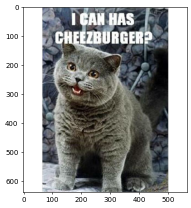

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import sys


meme_cat = cv.imread(cv.samples.findFile("i_can_has_cheezburger.png"))

# Closes program if image isn't found
if meme_cat is None:
    sys.exit("Could not read the image.")


# Shows image in Jupyter notebook
plt.figure(dpi=50)  # Increase dpi for higher resolution(default=100)
plt.imshow(cv.cvtColor(meme_cat, cv.COLOR_BGR2RGB)) # MatPlotLib reads images in RGB so it needs to be converted
plt.show()


## Getting Started with Video

### Playing a video from file

**ret_val** - is a Boolean variable store by the read() function. It determines the returned valuefor if the frame is being read correctly.
**ord()** - reads character input and returns a unicode that the script is using to preemptively break the script
**release()** - stops using system memory to hold the video information

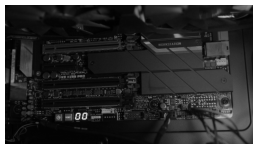

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

test_video = cv.VideoCapture('video (2160p).mp4')
plot_shown = False


while test_video.isOpened():
    ret_val, frame = test_video.read()

    # Loop breaking code if no more frames, or error     Q
    if ret_val is False:
        print("No frames detected(end of video or error)")
        break

    # Get the original video's width and height
    width = int(test_video.get(cv.CAP_PROP_FRAME_WIDTH))
    height = int(test_video.get(cv.CAP_PROP_FRAME_HEIGHT))

    # Calculate the desired width and height for scaling down
    scale_factor = 0.5  # You can adjust this value as per your needs
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)

    # Resize the frame
    resized_frame = cv.resize(frame, (new_width, new_height))

    # Grayscale the images
    gray_scaled = cv.cvtColor(resized_frame, cv.COLOR_BGR2GRAY)
    cv.imshow('Window Title', gray_scaled)

    # MatPlotLib
    if plot_shown is False:
        plt.figure(dpi=50)  # Increase dpi for higher resolution(default=100)
        plt.imshow(cv.cvtColor(gray_scaled, cv.COLOR_BGR2RGB)) # MatPlotLib reads images in RGB so it needs to be converted
        plt.title("First Frame Image")
        plt.axis('off')
        plt.show()
        plot_shown = True

    # 1000/FPS and the requied key press the break the loop
    if cv.waitKey(int(1000/30)) == ord('q'): 
        break
test_video.release()
cv.destroyAllWindows()

### Capture video from camera

In [ ]:
import numpy as np
import cv2 as cv


webcam = cv.VideoCapture(0)

# Script to cut if camera not working
if not webcam.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret_val, frame = webcam.read()

    # if frame is read correctly ret is True
    if not ret_val:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
    
# When everything done, release the capture
webcam.release()
cv.destroyAllWindows()

## Drawing Functions in OpenCV
cv.line(),  cv.circle(),  cv.rectangle(),  cv.putText()

In all the above functions, you will see some common arguments as given below:

- *img* : The image where you want to draw the shapes
- *color* : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the scalar value.
- *thickness* : Thickness of the line or circle etc. If **-1** is passed for closed figures like circles, it will fill the shape. **(default  thickness) = 1**
- *lineType* : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. **cv.LINE_AA** gives anti-aliased line which looks great for curves.

### Drawing Line

To draw a ```cv.line```, you need the **image**, the **starting** and **ending** coordinates of line, **color** in BGR format, pixel **width**

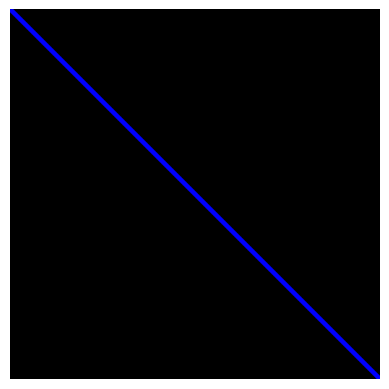

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt



# Create a black image
black_image = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px REMEMBER: BGR format
cv.line(black_image, (0,0), (511,511), (255,0,0), 5)

# Convert BGR to RGB for displaying with matplotlib
rgb_image = cv.cvtColor(black_image, cv.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

### Drawing Rectangle

To draw a ```cv.rectangle```, you need the **image**, the **Top-Left_Corner**, the **Bottom-Right-Corner** , **color** in BGR format, pixel **width**

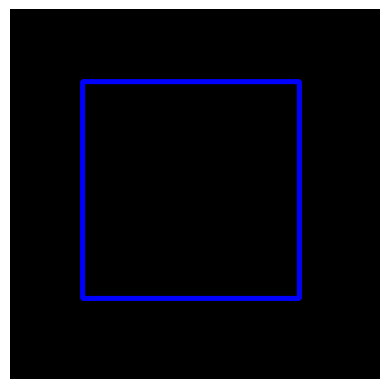

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt



# Create a black image
black_image = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue rectangle with thickness of 5 px REMEMBER: BGR format
cv.rectangle(black_image, (100,100), (400,400), (255,0,0), 5)

# Convert BGR to RGB for displaying with matplotlib
rgb_image = cv.cvtColor(black_image, cv.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

### Drawing Circle

To draw a ```cv.circle```, you need the **image**, the **Center**, the **Radius** , **color** in BGR format, pixel **width**

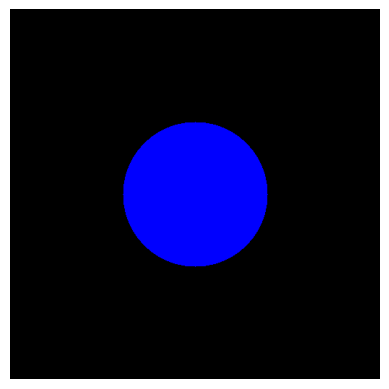

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt



# Create a black image
black_image = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue circle with thickness of -1 px REMEMBER: BGR format and thickness = -1 fills object
cv.circle(black_image, (256,256), 100, (255,0,0), -1)

# Convert BGR to RGB for displaying with matplotlib
rgb_image = cv.cvtColor(black_image, cv.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

### Adding Text

To draw a ```cv.puText```, you need the **image**, the **Bottom-Left**, the **Font-Type** , **Font-Scale** in BGR format, pixel **width**

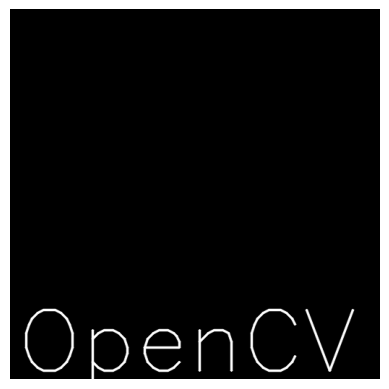

In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt



# Create a black image
black_image = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue circle with thickness of -1 px REMEMBER: BGR format and thickness = -1 fills object
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_image,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)

# Convert BGR to RGB for displaying with matplotlib
rgb_image = cv.cvtColor(black_image, cv.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

## Mouse as paintbrush


### Double clicking for circles

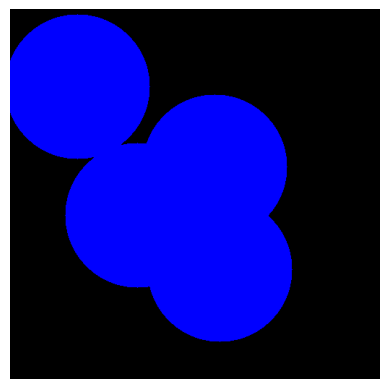

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(black_image,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
black_image = np.zeros((512,512,3), np.uint8)
cv.namedWindow('Circle Drawing Window')
cv.setMouseCallback('Circle Drawing Window',draw_circle)
while True:
    cv.imshow('Circle Drawing Window',black_image)
    if cv.waitKey(20) == ord('q'):
        break

# Convert the image to RGB for display in matplotlib
rgb_image = cv.cvtColor(black_image, cv.COLOR_BGR2RGB)

# Display the drawn image using matplotlib
plt.imshow(rgb_image)
plt.axis('off')
plt.show()
    
cv.destroyAllWindows()

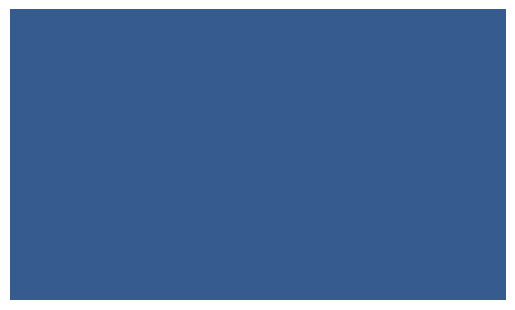

In [23]:

import numpy as np
import cv2 as cv

def nothing(x):
    pass

# Create a black image, a window (Height,Width,ColorChannels), 8-bit unsigned int(data type sepc)
black_image = np.zeros((300,512,3), np.uint8)
cv.namedWindow('RGB Trackbar')

# create trackbars for color change
cv.createTrackbar('R','RGB Trackbar',0,255,nothing)
cv.createTrackbar('G','RGB Trackbar',0,255,nothing)
cv.createTrackbar('B','RGB Trackbar',0,255,nothing)

# create switch for ON/OFF functionality
switch = 'OFF/ON'
cv.createTrackbar(switch, 'RGB Trackbar',1,1,nothing)

# Window loop
while True:
    # Cut the script for 'q'
    cv.imshow('RGB Trackbar',black_image)
    if cv.waitKey(20) == ord('q'):
        break

    # get current positions of four trackbars
    r = cv.getTrackbarPos('R','RGB Trackbar')
    g = cv.getTrackbarPos('G','RGB Trackbar')
    b = cv.getTrackbarPos('B','RGB Trackbar')
    s = cv.getTrackbarPos(switch,'RGB Trackbar')

    if s == 0:
        black_image[:] = 0
    else:
        black_image[:] = [b,g,r]

# Convert the image to RGB for display in matplotlib
rgb_image = cv.cvtColor(black_image, cv.COLOR_BGR2RGB)

# Display the drawn image using matplotlib
plt.imshow(rgb_image)
plt.axis('off')
plt.show()
    


cv.destroyAllWindows()
